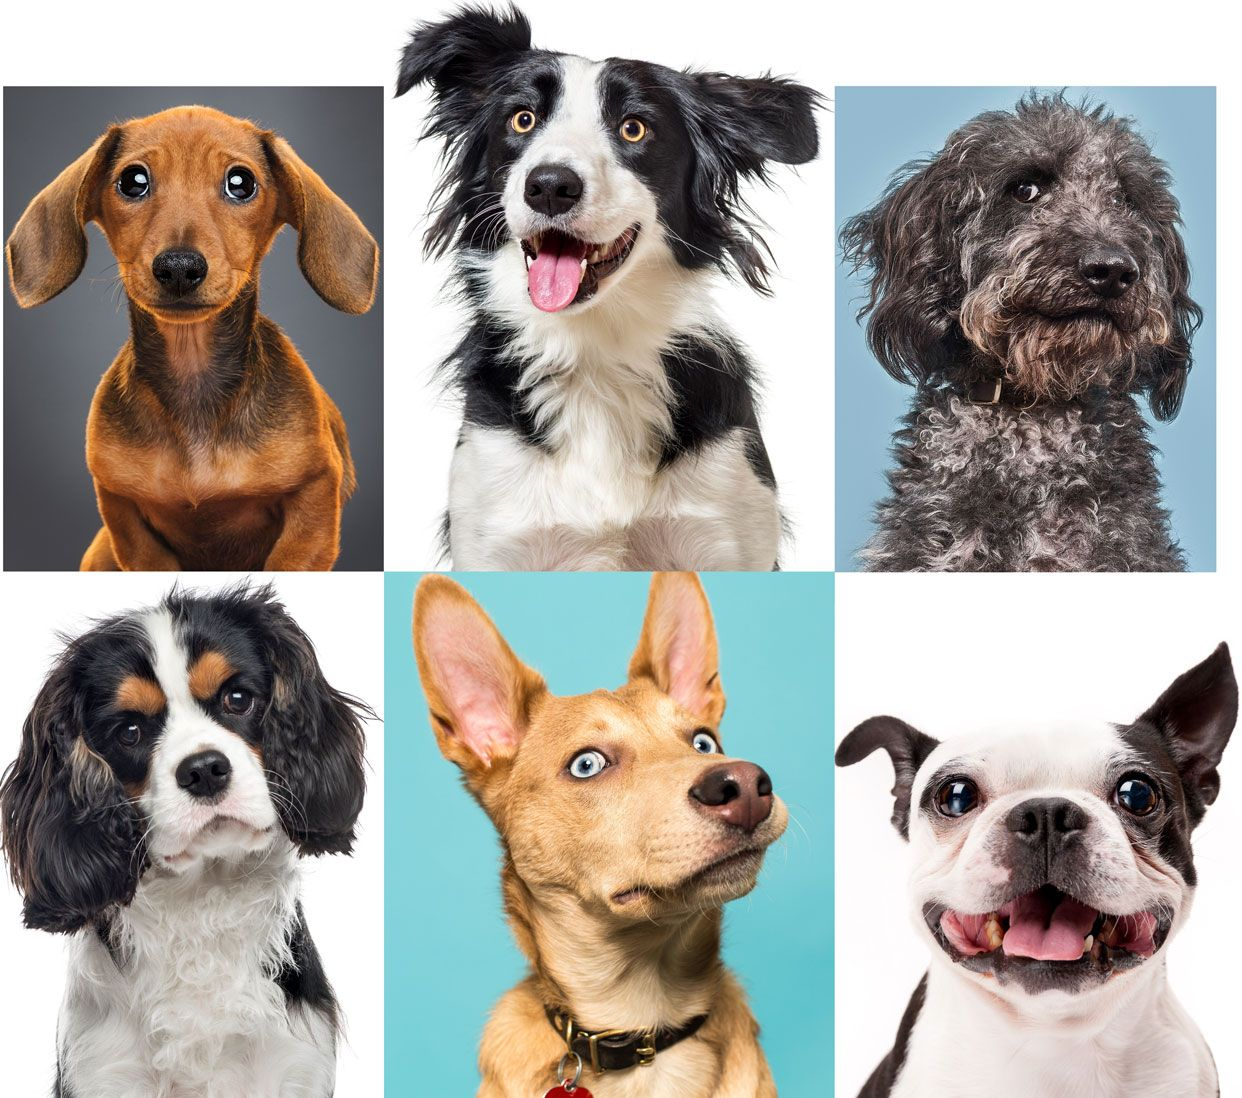

# Wrangling Data with WeRateDogs Tweets!

Hello! I will be your data digger today, and will see what this Twitter data can show us!

### Table of Contents

* [The Files: Introduction](#thefiles)
    * [Capture the Data](#capture)
    * [Explore the Data](#explore)
        * [image-predictions.tsv](#image)
        * [twitter-archive-enhanced.csv](#twitter)
        * [tweet_json.txt](#json)
    * [Call-Outs](#callouts)
* [Clean and Store Data](#clean)
    * [My Data Set](#mine)
* [Analysis](#analysis)

In [1]:
import requests
import pandas as pd
import json
import datetime

from matplotlib import pyplot as plt

# The Files: Introduction <a class="anchor" id="thefiles"></a>

We have three files for this project that we need to collect: image-predictions.tsv, twitter-archive-enhanced.csv, and tweet_json.txt.

## Capture the Data <a class="anchor" id="capture"></a>

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', '\t') 
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
tweet_df = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet-json.txt', 'r') as file:
    for line in file:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_df = tweet_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))

tweet_df = tweet_df.reset_index(drop=True)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Explore the Data <a class="anchor" id="explore"></a>

In [7]:
print(len(image_predictions))
print(len(twitter_archive_enhanced))
print(len(tweet_df))

2075
2356
2354


In [8]:
print(sum(image_predictions.duplicated()))
print(sum(twitter_archive_enhanced.duplicated()))
print(sum(tweet_df.duplicated()))

0
0
0


**QUALITY CALL-OUT:** All three flies do not contain the same number of rows.

### image-prediction.tsv <a class="anchor" id="image"></a>

This file contains a tweet ID from a given post on WeRateDogs with its original image. Image number must mean the number of images per tweet. From an image neural network, there are three predictions supplied in the form of text - a label of what the image is. Then there are confidence intervals  of how confident the algorithm is on what it classified. Finally, a flag of whether the prediction is a dog or not - possibly a process on top of the predictions to say if it's a dog or not.

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All columns seem to be 100% filled.

**QUALITY CALL-OUT:** Tweet ID is an integer. Need to check to see if other dataframes have integers, floats or strings for IDs to make sure linking dataframes is possible.

In [10]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


*Confindence intervals for p2 and p3 are very small. p1 seems more important to look at, but this is only an aside since we're looking for quality and tidiness. Without any practical means to check precision of predictions, data quality here is not something to determine in that fashion.*

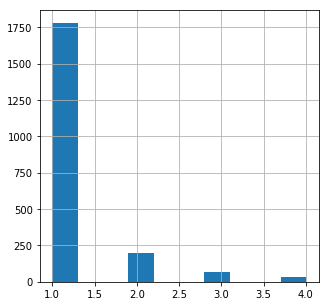

In [11]:
plt.figure(figsize=(5,5))
image_predictions['img_num'].hist()
plt.show()

The majority of tweets have only one photo. Question: Do tweets with more than one photo have individual predictions - one row per photo - or was only the first photo used since the others could be redudant? It's not clear what the purpose of stating there are multiple photos in a tweet is.

In [12]:
image_predictions[image_predictions['img_num']==4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


In [13]:
image_predictions[image_predictions['tweet_id']==668623201287675904]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False


Seems like this is just a count of photos from the original tweet, but does not reflect in the data that there are 4 rows for this ID. Each row must be unique per tweet. If we take couple of examples, we can see what this looks like.

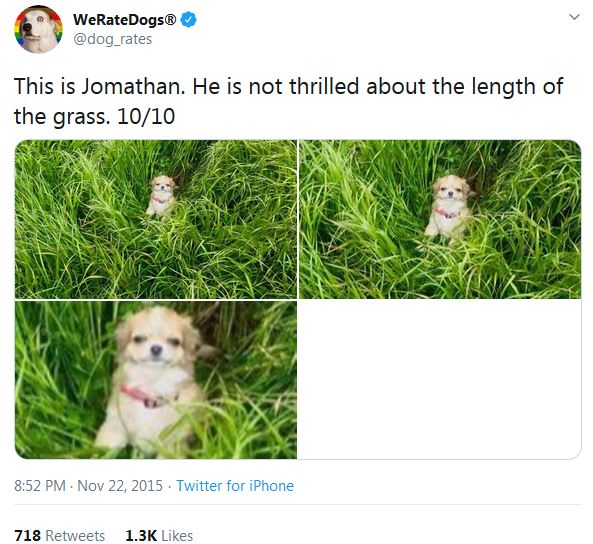

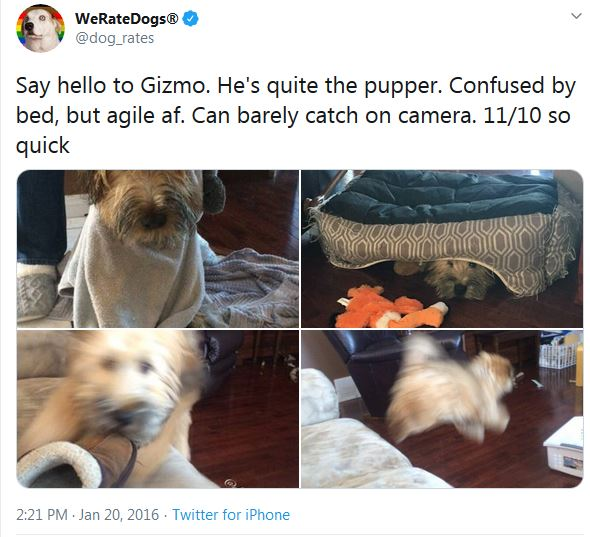

**QUALITY CALL-OUT:** The first one does not have 4 photos. So, this could be a mistake for this column.

If we look at the predictions, the first one is a miss all around and the second one's p2 is more correct. There will definitely be quality issues with these predictions, but it's not easily determined and probably out of scope for this project.

In [14]:
image_predictions[image_predictions['p1_dog']==True]['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
Cardigan                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
beagle                             18
Shih-Tzu                           17
Rottweiler                         17
Lakeland_terrier                   17
kuvasz                             16
Italian_grey

In [15]:
dog_breeds = sorted(list(set(image_predictions[image_predictions['p1_dog']==True]['p1'])))
dog_breeds

['Afghan_hound',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_sheepdog',
 'Pekinese',
 'Pembroke',
 'Pomeranian',
 'Rhodesian_ridgeback',
 'Rottweiler',
 'Saint_Be

**TIDINESS CALL-OUT:** This seems clean. Only thing to note would be the capitalization of specific breeds, while other breeds are all lowercase. "basenji," "cairn" or "groenendael" may be correct to be lowercase, but "Airedale," "Border_collie" or "Chihuahua" seem like they could be lowercase. So, maybe they should all be lowercase for consistency. 

In [16]:
image_predictions[image_predictions['p1_dog']==False]['p1'].value_counts()

seat_belt            22
web_site             19
teddy                18
dingo                 9
tennis_ball           9
doormat               8
hamster               7
Siamese_cat           7
tub                   7
bath_towel            7
swing                 7
llama                 6
ice_bear              6
car_mirror            6
home_theater          6
ox                    5
minivan               5
shopping_cart         5
hippopotamus          5
porcupine             5
bow_tie               4
Arctic_fox            4
wombat                4
barrow                4
goose                 4
brown_bear            4
patio                 4
bathtub               4
hog                   4
jigsaw_puzzle         4
                     ..
tailed_frog           1
bannister             1
coffee_mug            1
nail                  1
envelope              1
conch                 1
earthstar             1
cheetah               1
park_bench            1
padlock               1
sea_urchin      

***Quality issue?*** *These predictions to be able to label what breed of dog the photo is seems mixed with non-dog labels. As a data scientist, I would say this is a data quality issue since non-dog pictures should not be in the training set since the objective is to label the breed of dog rather than trying to classify a dog in general. But...I don't know if this would be part of this exercise since we are supplied with True and False on if the prediction is a dog or not...*

In [17]:
image_predictions[image_predictions['p1_dog']==False].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,5.430000e+02,543.000000,543.000000,5.430000e+02,5.430000e+02
mean,7.257665e+17,1.178637,0.540167,1.155780e-01,5.614976e-02
std,6.398110e+16,0.525498,0.294639,9.284124e-02,4.571410e-02
min,6.660519e+17,1.000000,0.059033,1.011300e-08,1.740170e-10
25%,6.729825e+17,1.000000,0.280340,4.617995e-02,1.818890e-02
50%,6.946697e+17,1.000000,0.493257,9.872700e-02,4.881320e-02
75%,7.693038e+17,1.000000,0.821904,1.606135e-01,8.260440e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.551820e-01


In [18]:
image_predictions[image_predictions['p1_dog']==True].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,7.429474e+17,1.212794,0.613823,0.141327,6.180374e-02
std,6.863141e+16,0.574115,0.259735,0.102482,5.255780e-02
min,6.660209e+17,1.000000,0.044333,0.000023,2.160900e-07
25%,6.787998e+17,1.000000,0.390981,0.057067,1.540992e-02
50%,7.200513e+17,1.000000,0.614025,0.127964,4.995100e-02
75%,7.987548e+17,1.000000,0.850559,0.203748,9.527215e-02
max,8.921774e+17,4.000000,0.999956,0.467678,2.734190e-01


**QUALITY CALL-OUT:** Seeing the difference in mins, maxes, and means of both dog and non-dog predictions, I would say this is a quality issue since we do have, with high confidence, tweets with no dogs unless we have tweets that have nothing to do with WeRateDogs OR tweets at WeRateDogs were not about dogs. Either way, seems like a possible quality issue to try to investigate.

In [19]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### twitter-archive-enhanced.csv <a class="anchor" id="twitter"></a>

The twitter_archive_enhanced file has tweet ID, which is an integer. Then a couple of columns I'm not familiar with that are barely populated. We have a timestamp of the tweet with YYYY-MM-DD HH:MM:SS (and something else) as the format. Source of the tweet may be directly from a device source with a text comment. Then there are retweet columns that are not commonly populated in the dataset. Expanded URLs are not very clear - possibly Twitter's directory on the back-end to contain the tweet? (Not 100% populated.) Ratings follow with name of the dog and then some flags designating what kind of dog in doggo lingo.

In [20]:
twitter_archive_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [21]:
print(twitter_archive_enhanced['source'][0])
print(twitter_archive_enhanced['expanded_urls'][0])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
https://twitter.com/dog_rates/status/892420643555336193/photo/1


In [22]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [24]:
print(pd.DatetimeIndex(twitter_archive_enhanced['timestamp']).year.min())
print(pd.DatetimeIndex(twitter_archive_enhanced['timestamp']).year.max())

2015
2017


In [25]:
lst = list(pd.DatetimeIndex(twitter_archive_enhanced['timestamp']).year)
temp = pd.DataFrame(lst, columns=['year'])
temp['year'].value_counts()

2016    1183
2015     690
2017     483
Name: year, dtype: int64

In [26]:
twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Interesting, but not interesting, that there are only 4 values for the source column. Since this column is 100%, doesn't seem like there's any call-out to make on quality or tidiness.

Skipinng to expanded URLs, on the other hand, seem unique, but it's difficult to know what's "clean" here. It seems like this contains more than one link. Without a data dictionary, it's very difficult for me to make any kind of call here. The column is not 100% populated and there are multiple links in this. I'm not sure what value would be gained here.

*This might be considered a tidiness issue given we have multiple values in one column. But again, is this intended and means something or not?*

In [27]:
twitter_archive_enhanced['expanded_urls'][:10]

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://gofundme.com/ydvmve-surgery-for-jax,ht...
7    https://twitter.com/dog_rates/status/890729181...
8    https://twitter.com/dog_rates/status/890609185...
9    https://twitter.com/dog_rates/status/890240255...
Name: expanded_urls, dtype: object

In [28]:
twitter_archive_enhanced['expanded_urls'][6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [29]:
url_list = []
for i in range(0,len(twitter_archive_enhanced['expanded_urls'])):
    if pd.isnull(twitter_archive_enhanced['expanded_urls'][i]) == True:
        i += 1
    else:
        url_list.append(twitter_archive_enhanced['expanded_urls'][i].split(','))

url_list = [url for lst in url_list for url in lst]
unique_url_list = sorted(list(set(url_list)))
len(unique_url_list)

2169

In [30]:
unique_url_list[:10]

['http://goo.gl/ArWZfi',
 'http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_',
 'http://us.blastingnews.com/news/2017/01/kentucky-teen-helps-lost-yellow-labrador-and-gets-a-huge-surprise-001431969.html?sbdht=_pM1QUzk3wsenGU1giO7UnJ5NGGiKRW9AD5xs2MkaDpYY13JxbtKE4w2_',
 'http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_',
 'http://www.gofundme.com/bluethewhitehusky',
 'https://gofundme.com/ydvmve-surgery-for-jax',
 'https://m.facebook.com/story.php?story_fbid=1888712391349242&id=1506300642923754&refsrc=http%3A%2F%2Ft.co%2FURVffYPPjY&_rdr',
 'https://m.youtube.com/watch?v=idKxCMsS3FQ&feature=youtu.be',
 'https://twitter.com/4bonds2carbon/status/885517367337512960',
 'https://twitter.com/AaronChewning/status/857061112319234050/photo/1']

The last link takes me to a tweet about a member of the WeRateDogs community wearing a WeRateDogs hat, but no dogs are in the picture. 

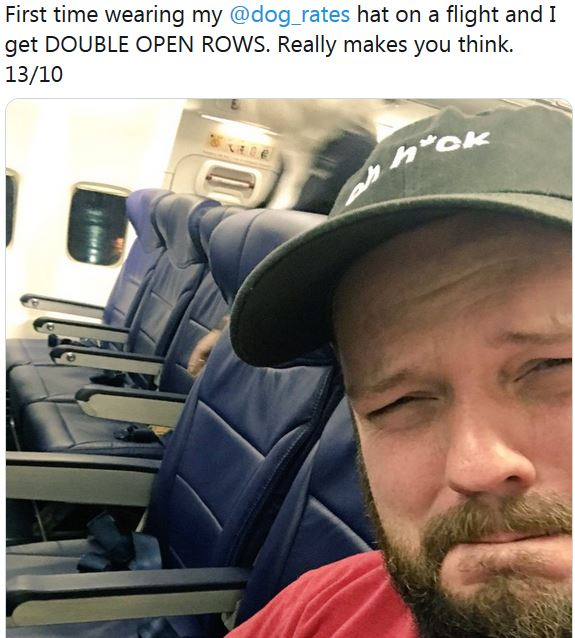

Clearly, there can be many things going on at WeRateDogs, which muddies the waters of what kind of dataset we're looking at if we're only concerned about dogs.

In [31]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'] == 'https://twitter.com/AaronChewning/status/857061112319234050/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,58709723.0,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None


**QUALITY CALL-OUT:** So it does look like "source" is the device of origin of the tweet and the "expanded_url" is the tweet itself. Since "source" is not that interesting, this should be dropped. Since the original tweet is stored in "expanded_url," this may be more important to preserve valid origins.

Please note the tweet ID and the number in the link are not the same here:
- ID: 857062103051644929
- "expanded_url": https://twitter.com/AaronChewning/status/857061112319234050/photo/1

If you put the ID after "/status/", then you're redirected to the tweet, but there is a header on the tweet "WeRateDogs Retweeted" and the comments below are missing. So, a question would be, are all tweet IDs from WeRateDogs (tweet or retweet) and why are their nulls in "expanded_url?" No "expanded_url" means original tweet based on ID?

In [32]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id'] == 857061112319234050]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id'] == 857062103051644929]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,58709723.0,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None


https://gwu-libraries.github.io/sfm-ui/posts/2016-11-10-twitter-interaction

Trying to understand the data, for this ID, there are no replies. But, as I showed above, it is a retweet. WeRateDogs retweeted this guy's tweet since this guy referenced WeRateDogs concerning some merchandise.

Because of the link above, this dataset could be messy to navigate with the kinds of traffic tweets get. I thought this dataset was about dogs from WeRateDogs directly. Let's look at the .info() again.

In [34]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

78 tweets with replies; 181 retweets; 2297 out of 2356 tweets with "expanded_urls"

In [35]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'] == 'https://twitter.com/4bonds2carbon/status/885517367337512960']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None


Picking the second "expanded_urls" from last just to see no retweet data in the their respective columns, and even though this original tweet no longer exists, using the ID again takes me to WeRateDogs linking this original tweet.

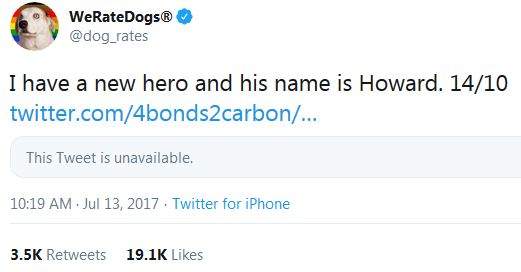

So, can it be said that any row with "expanded_urls" contains the original tweet that WeRateDogs is retweeting, linking, etc.? All "tweet_id" is from WeRateDogs? Let's take a look at a row without "expanded_urls."

In [36]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      59 non-null int64
in_reply_to_status_id         55 non-null float64
in_reply_to_user_id           55 non-null float64
timestamp                     59 non-null object
source                        59 non-null object
text                          59 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 0 non-null object
rating_numerator              59 non-null int64
rating_denominator            59 non-null int64
name                          59 non-null object
doggo                         59 non-null object
floofer                       59 non-null object
pupper                        59 non-null object
puppo                         59 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 8.3+ KB


In [37]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


A majority of these have replies, which taking the first one looks like this:

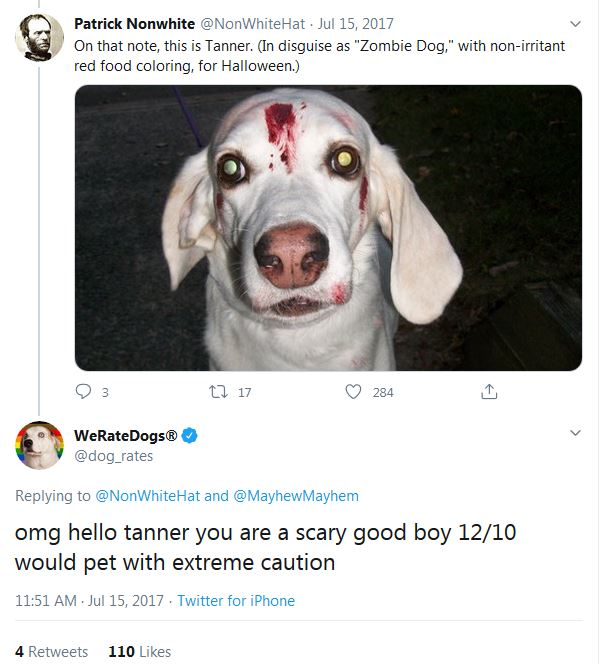

I don't think this is a quality issue since there is nothing wrong with replies - there is nothing erroneous about this reply. If we want only tweets focused on WeRateDogs as the source, then this could be tidiness or quality concerns.

In [38]:
twitter_archive_enhanced[(twitter_archive_enhanced['expanded_urls'].isnull()) & (twitter_archive_enhanced['in_reply_to_status_id'].isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


The second in the list seems to be an original post by WeRateDogs: No links or replies or retweets of others' posts. (https://twitter.com/dog_rates/status/828361771580813312)

So, at least from what we're seeing, if there is nothing in the reply, retweet or expanded_urls columns, it's an original tweet by WeRateDogs.

What's troubling is I'm not seeing a lot of pictures of dogs with these examples, few as they are, directly from WeRateDogs... If we're going to be pairing predictions of breeds, I'm wondering how this pans out.

Returning to the "expanded_urls" list:

In [39]:
unique_url_list[-10:]

['https://www.gofundme.com/mingusneedsus',
 'https://www.gofundme.com/my-puppys-double-cataract-surgery',
 'https://www.gofundme.com/sams-smile',
 'https://www.gofundme.com/servicedogoliver',
 'https://www.gofundme.com/sick-baby-samson',
 'https://www.gofundme.com/surgeryforjacktheminpin',
 'https://www.loveyourmelon.com/pages/ourstory',
 'https://www.patreon.com/WeRateDogs',
 'https://www.petfinder.com/petdetail/34918210',
 'https://www.petfinder.com/petdetail/37334596']

I suspect that these non-twitter links are paired with sharing. Since I have no way of finding out, I think isolating the twitter links and keeping them would be better than making separate columns for each link associated with the tweet. However, I'm still not sure what to think about this column and how we look at the whole picture of "quality and tidiness."

In [40]:
from urllib.parse import urlparse

parsed_url = []
for url in unique_url_list:
    parsed = urlparse(url)
    parsed_url.append(parsed.netloc)

parsed_df = pd.DataFrame(parsed_url, columns=["netloc"])
parsed_df['netloc'].value_counts()

twitter.com              2046
vine.co                    90
www.gofundme.com           21
us.blastingnews.com         3
www.petfinder.com           2
weratedogs.com              1
www.loveyourmelon.com       1
m.facebook.com              1
www.patreon.com             1
m.youtube.com               1
goo.gl                      1
gofundme.com                1
Name: netloc, dtype: int64

It's good that the majority is from Twitter. Still not really clear on everything else, though.

Let's move on to ratings.

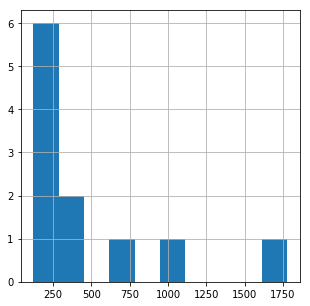

In [41]:
plt.figure(figsize=(5,5))
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 100]['rating_numerator'].hist()
plt.show()

In [42]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 14]['rating_numerator'].value_counts(bins=10)

(13.238000000000001, 191.1]    22
(367.2, 543.3]                  2
(1599.9, 1776.0]                1
(895.5, 1071.6]                 1
(543.3, 719.4]                  1
(191.1, 367.2]                  1
(1423.8, 1599.9]                0
(1247.7, 1423.8]                0
(1071.6, 1247.7]                0
(719.4, 895.5]                  0
Name: rating_numerator, dtype: int64

In [43]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


**QUALITY CALL-OUT:** Index 313 seems to have a 0 for the rating_denominator. And it looks like the one with 24 as the numerator and 7 as the denominator are not ratings but the saying "24/7" referring to 24hrs a day, 7 days a week as indicated by the "text" column. So, this is a mistake.

In [44]:
twitter_archive_enhanced['text'][516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

Let's see what the distribution is for the numerators. I'm thinking some of these, even if an actual rating are in jest for a particular light-hearted moment.

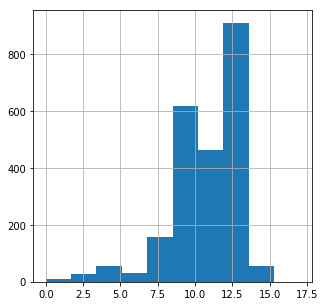

In [45]:
plt.figure(figsize=(5,5))
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] < 20]['rating_numerator'].hist()
plt.show()

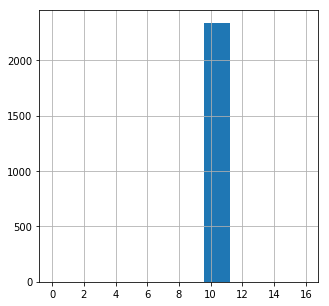

In [46]:
plt.figure(figsize=(5,5))
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] < 20]['rating_denominator'].hist()
plt.show()

In [47]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] < 20]['rating_denominator'].value_counts()

10    2333
11       3
15       1
7        1
16       1
2        1
0        1
Name: rating_denominator, dtype: int64

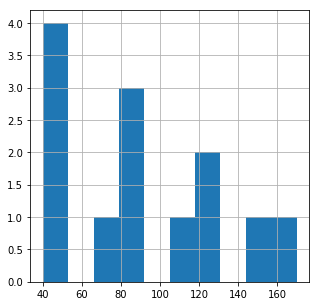

In [48]:
plt.figure(figsize=(5,5))
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] > 20]['rating_denominator'].hist()
plt.show()

I'm hard-pressed to find clarity about the denominator, but it's common to have something x/10. The x can be greater than 10 for whatever purpose, but I'm wanting to think the denominator is supposed to be fixed to 10.

In [49]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


**QUALITY CALL-OUT:** The very first in the list is a perfect example of quality issues! For the sake of sanity, any denominator not equal to 10 will be filtered. Also, it seems ratings under 20 for the numerator should be the focus since that is the norm.

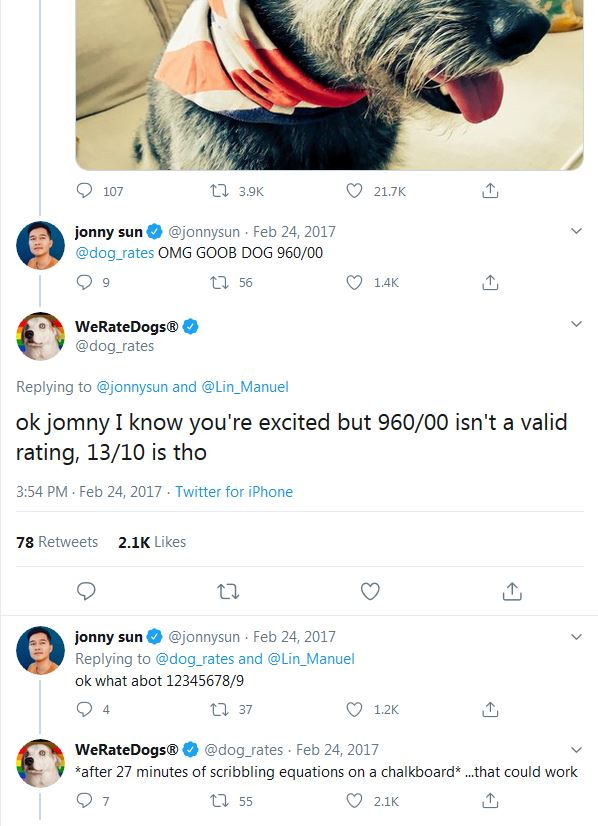

In [50]:
twitter_archive_enhanced['name'].nunique()

957

In [51]:
twitter_archive_enhanced['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Bailey        7
an            7
Buddy         7
Daisy         7
Jack          6
Bella         6
Dave          6
Leo           6
Scout         6
Jax           6
Stanley       6
Oscar         6
Rusty         6
Koda          6
Milo          6
Alfie         5
           ... 
Brutus        1
Juckson       1
Laika         1
Divine        1
Karl          1
Bobby         1
Linus         1
Darrel        1
Tango         1
Kanu          1
Pinot         1
Lugan         1
Leonidas      1
Grey          1
Jarvis        1
Dante         1
Swagger       1
Tommy         1
Frönq         1
Dale          1
Tino          1
Kara          1
Jarod         1
Ziva          1
Brockly       1
Cupid         1
Shooter       1
such          1
Aubie         1
Bubba         1
Name: name, Length: 957,

**QUALITY CALL-OUT:** There are some invalid names, especially a "None" when it should probably be null.

In [52]:
twitter_archive_enhanced[twitter_archive_enhanced['name'].str.len() < 5]['name'].value_counts()

None    745
a        55
Lucy     11
Lola     10
Bo        9
the       8
Toby      7
an        7
Milo      6
Dave      6
Jax       6
Koda      6
Jack      6
Leo       6
very      5
Finn      5
Phil      5
Gus       5
Bear      4
Chip      4
Beau      4
Gary      4
Carl      4
Luna      4
Hank      4
Duke      4
just      4
Loki      4
one       4
Ruby      4
       ... 
Opie      1
Jed       1
Rilo      1
Ace       1
Blue      1
life      1
this      1
Skye      1
Evy       1
Jett      1
Stu       1
Karl      1
Mo        1
Ed        1
Cal       1
Joey      1
Theo      1
Gin       1
Kody      1
Zeus      1
Yoda      1
Pete      1
Dug       1
Herb      1
Rose      1
Gert      1
Puff      1
Maya      1
Pip       1
Dido      1
Name: name, Length: 257, dtype: int64

**QULAITY CALL-OUT:** The real question is, what value would having a name of a dog give in an anlysis? Since we have mostly unique names, this column is too granular to perform aggregate analysis. I will drop this column.

Lastly, the remaning 4 columns...

In [53]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [54]:
twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [55]:
twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [56]:
twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [57]:
(twitter_archive_enhanced['doggo']+twitter_archive_enhanced['floofer']+twitter_archive_enhanced['pupper']+twitter_archive_enhanced['puppo']).value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
dtype: int64

https://www.rover.com/blog/uk/do-you-speak-doggolingo-dog-internet-jargon-explained/

- "doggo" - all dogs are "doggos"
- "pupper" - puppy
- "puppo" - (general Google search) cute dog
- "floofer" - large, fluffy dog
- *"woofers" - large dogs (not in this dataset)*

**TIDINESS CALL-OUT:** Firstly, why have a column called "doggo," for example, but have only the value "doggo" (aside from "None") in this column? This should be a Y/N or 1/0 flag column. But, if "doggo" refers to all dogs, this is not necessary. This is an example of variable spread over several columns when it could be in one column. In the case of multiple kinds of dogs in a tweet in this classification, then "multiple" could be used. Otherwise, this seems unique and could simply be the "doggo" column with "pupper," "puppo," and "floofer" as it's values. Given that this classification is not very populated, these columns aren't insightful and will be dropped.

### Recap!

Since this file seems to have a hefty amount of concerns, let's summarize:

- TO NOTE:
    - "source" essentially has "Twitter for iPhone" as the common value in this column with 2221 entires out of 2356. Little value can be taken here and will be dropped

- TIDINESS CONCERNS:
    - "expanded_urls" contain more than one link/value. Since this seems to have the original tweet, this could be valuable for an analysis and should be cleaned
    - "doggo," "pupper," "puppo," and "floofer" are not commonly used ("doggo" by definition is all dogs and is redundant) and the values in the columns are "None" or the name of the column, which is not helpful - if these values had enough use, then it would be better to make these values as Y/N or 1/0 flags instead

- QUALITY CONCERNS:
    - "expanded_urls" only has 2297 rows; extra links in column that aren't immediately traceable - at least 2046 links are from Twitter
    - Ratings have misleading values, but it's decided to find norms for values and filter accordingly
    - "names" has "None" or values such as "a," "the," and "an" as a name. Since "names" seems highly unique, it does not lend itself to a meaningful anaylsis and will be dropped

### tweet_json.txt <a class="anchor" id="tweet"></a>

For simplicity's sake, only three columns were chosen: tweet_id, retweet_counts and favorite_counts, which are all **not integers**. (**QUALITY CALL-OUT**)

In [58]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [59]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


**CLEANING STEP #1 and #2:** 

**DEFINE:** Change "retweet_count" and "favorite_count" into integers; change the other two files "tweet_id" to string.

**CODE:**

In [60]:
tweet_df_copy = tweet_df.copy()
tweet_df_copy[['retweet_count','favorite_count']] = tweet_df_copy[['retweet_count','favorite_count']].astype(int)

In [61]:
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
twitter_archive_enhanced_copy['tweet_id'] = twitter_archive_enhanced['tweet_id'].astype(str)

In [62]:
image_predictions_copy = image_predictions.copy()
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype(str)

**TEST:**

In [63]:
tweet_df_copy.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [64]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [65]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [66]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Resuming review of tweet_df...

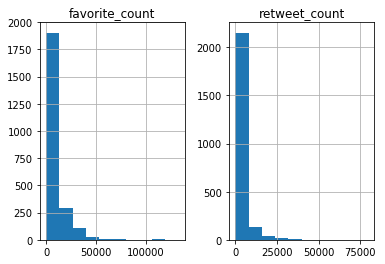

In [67]:
plt.figure(figsize=(5,5))
tweet_df_copy[['retweet_count','favorite_count']].hist()
plt.show()

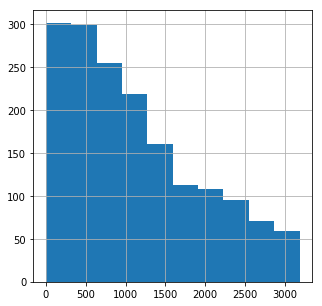

In [68]:
plt.figure(figsize=(5,5))
tweet_df_copy[tweet_df_copy['retweet_count'] < 3200]['retweet_count'].hist()
plt.show()

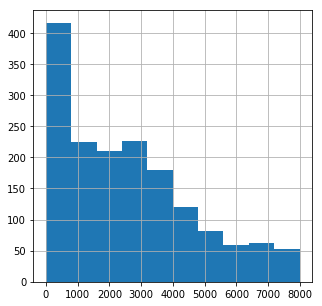

In [69]:
plt.figure(figsize=(5,5))
tweet_df_copy[tweet_df_copy['favorite_count'] < 8000]['favorite_count'].hist()
plt.show()

Not much to be said here.

## Call-Outs <a class="anchor" id="callouts"></a>

### Overall
TIDINESS CONCERN:
- All three files can be combined into one using the tweet_id column, which should be uniformly formated across all three dataframes

QUALITY CONCERNS:
- All three files do not have the same number of rows; data will be lost
- Mixed type of tweets: if the aim is to take information of what kind of dogs are in the pictures of tweets at WeRateDogs, then there are definitely tweets without dog pictures or no pictures at all making the image_prediction file questionable for meaningful use

### image_predictions
QUALITY CONCERNS:
- Definitely some bad predictions
- "img_num" does not always reflect the number of photos in a tweet
- dog names in p1, p2, and p3 should be all lowercase for consistency

### twitter_archive_enhanced
TO NOTE:
- "source" essentially has "Twitter for iPhone" as the common value in this column with 2221 entires out of 2356. Little value can be taken here and will be dropped

TIDINESS CONCERNS:
- "expanded_urls" contain more than one link. Since this seems to have the original tweet, this could be valuable for an analysis and should be cleaned
- "doggo," "pupper," "puppo," and "floofer" are not commonly used ("doggo" by definition is all dogs and is redundant) and the values in the columns are "None" or the name of the column, which is not helpful - if these values had enough use, then it would be better to make these values as Y/N or 1/0 flags instead or collapse this to one column with "pupper," "puppo," and "floofer" values only

QUALITY CONCERNS:
- "expanded_urls" only has 2297 rows; extra links in column that aren't immediately traceable - at least 2046 links are from Twitter
- Ratings have misleading values, but it's decided to find norms for values and filter accordingly
- "name" has "None" or values such as "a," "the," and "an" as a name. Since "name" seems highly unique, it does not lend itself to a meaningful anaylsis and will be dropped

### tweet_json
QUALITY CONCERNS:
- "retweet_count" and "favorite_count" columns have string values and should be integers

# Clean and Store Data <a class="anchor" id="clean"></a>

**CLEANING STEP #3:**

**DEFINE:** Merge all three files into one dataframe

**CODE:**

In [70]:
temp_df = pd.merge(twitter_archive_enhanced_copy, tweet_df_copy, how='inner', on=['tweet_id'], sort=True)
twitter_df = pd.merge(temp_df, image_predictions_copy, how='inner', on=['tweet_id'], sort=True)
twitter_df.reset_index(drop=True, inplace=True)

**TEST:**

In [71]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [72]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073

**CLEANING STEP #4 and #5:**

**DEFINE:** Collect only non-retweeted, non-replied tweets and drop related columns.

**CODE AND TEST:**

In [73]:
twitter_df = twitter_df[(twitter_df['retweeted_status_id'].isnull()) & (twitter_df['in_reply_to_status_id'].isnull())]
twitter_df.drop(['in_reply_to_status_id','in_reply_to_user_id',
                 'retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp'], axis=1, inplace=True)
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null flo

**CLEANING STEP #6, #7, #8:**

**DEFINE:** Capture more "normal" ratings, especially a denominator of 10; drop "doggo" columns due to low use; drop "source" column since it does not provide additional value with the majority of sources as "iPhone."

**CODE AND TEST:**

In [74]:
twitter_df = twitter_df[(twitter_df['rating_denominator']==10) & (twitter_df['rating_numerator'] < 20)]
twitter_df.drop(['source','rating_denominator','name','doggo','floofer','pupper','puppo'], axis=1, inplace=True)
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2072
Data columns (total 18 columns):
tweet_id            1949 non-null object
timestamp           1949 non-null object
text                1949 non-null object
expanded_urls       1949 non-null object
rating_numerator    1949 non-null int64
retweet_count       1949 non-null int64
favorite_count      1949 non-null int64
jpg_url             1949 non-null object
img_num             1949 non-null int64
p1                  1949 non-null object
p1_conf             1949 non-null float64
p1_dog              1949 non-null bool
p2                  1949 non-null object
p2_conf             1949 non-null float64
p2_dog              1949 non-null bool
p3                  1949 non-null object
p3_conf             1949 non-null float64
p3_dog              1949 non-null bool
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 249.3+ KB


**CLEANING STEP #9**

**DEFINE:** Dog breed names should be all lowercase for consistency.

**CODE AND TEST:**

In [75]:
twitter_df['p1'] = twitter_df['p1'].str.lower()
twitter_df['p2'] = twitter_df['p2'].str.lower()
twitter_df['p3'] = twitter_df['p3'].str.lower()
twitter_df['p1'].value_counts()

golden_retriever             134
labrador_retriever            91
pembroke                      88
chihuahua                     78
pug                           54
chow                          41
samoyed                       40
pomeranian                    37
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            21
seat_belt                     21
german_shepherd               20
siberian_husky                19
staffordshire_bullterrier     19
eskimo_dog                    18
shetland_sheepdog             18
shih-tzu                      17
maltese_dog                   17
cardigan                      17
beagle                        17
rottweiler                    16
italian_greyhound             16
teddy                         16
lakeland_terrier              15
kuvasz                        14
web_site                      14
          

**ADDITIONAL STEP:**

**DEFINE:** Create a month column for analysis in case time of year seems relevant to tweets.

**CODE AND TEST:**

In [76]:
twitter_df.insert(2, 'month', pd.DatetimeIndex(twitter_df['timestamp']).month, True)
twitter_df[['timestamp','month']].head()

,timestamp,month
0,2015-11-15 22:32:08 +0000,11
1,2015-11-15 23:05:30 +0000,11
2,2015-11-15 23:21:54 +0000,11
3,2015-11-16 00:04:52 +0000,11
4,2015-11-16 00:24:50 +0000,11


**ATTEMPT TO ADDRESS TIDINESS OF MULTIPLE URLS IN A SINGLE COLUMN (CLEANING STEP #10):**

**DEFINE:** "expanded_urls" are important for orgins of the tweet and may have some value outside the scope of this project. Can we handle this in some way to maintain the record or do we simply leave it for future use?

**CODE:**

In [77]:
comma_count = pd.DataFrame([url.count(',') for url in twitter_df['expanded_urls']], columns=['count'])
comma_count['count'].value_counts()

0    1448
1     280
2     109
3     104
4       8
Name: count, dtype: int64

In [78]:
twitter_count = pd.DataFrame([url.count('twitter.com') for url in twitter_df['expanded_urls']], columns=['count'])
twitter_count['count'].value_counts()

1    1455
2     284
4     111
3      99
Name: count, dtype: int64

Well, the good news is every expanded_urls has twitter in them in this finalized set. However, I'm not going to be able to pick out the "relevant" url since I do not understand what this means to have so many links. I will not use this column.

This completes the cleaning stage. Now, I will narrow down the data for my own purposes.

In [79]:
master_archive = twitter_df.copy()
master_archive.to_csv('twitter_archive_master.csv', index=False);

## My Data Set <a class="anchor" id="mine"></a>

In [80]:
twitter_df.reset_index(drop=True, inplace=True)
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 19 columns):
tweet_id            1949 non-null object
timestamp           1949 non-null object
month               1949 non-null int64
text                1949 non-null object
expanded_urls       1949 non-null object
rating_numerator    1949 non-null int64
retweet_count       1949 non-null int64
favorite_count      1949 non-null int64
jpg_url             1949 non-null object
img_num             1949 non-null int64
p1                  1949 non-null object
p1_conf             1949 non-null float64
p1_dog              1949 non-null bool
p2                  1949 non-null object
p2_conf             1949 non-null float64
p2_dog              1949 non-null bool
p3                  1949 non-null object
p3_conf             1949 non-null float64
p3_dog              1949 non-null bool
dtypes: bool(3), float64(3), int64(5), object(8)
memory usage: 249.4+ KB


In [81]:
my_df = twitter_df[twitter_df['p1_dog']==True][['month','rating_numerator','retweet_count','favorite_count','p1']]
my_df.reset_index(drop=True, inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 5 columns):
month               1446 non-null int64
rating_numerator    1446 non-null int64
retweet_count       1446 non-null int64
favorite_count      1446 non-null int64
p1                  1446 non-null object
dtypes: int64(4), object(1)
memory usage: 56.6+ KB


# Analysis <a class="anchor" id="analysis"></a>

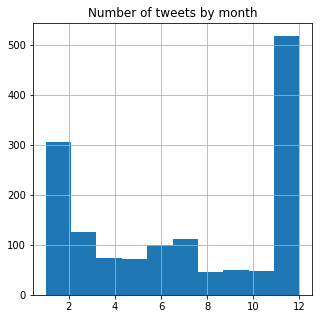

In [82]:
plt.figure(figsize=(5,5))
my_df['month'].hist()
plt.title('Number of tweets by month')
plt.show()

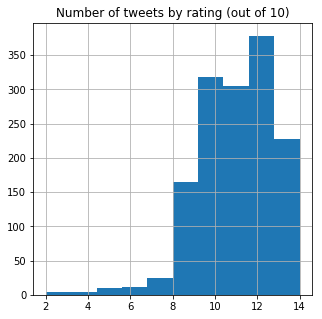

In [83]:
plt.figure(figsize=(5,5))
my_df['rating_numerator'].hist()
plt.title('Number of tweets by rating (out of 10)')
plt.show()

Definitely see distinct patterns here with the winter months have more tweets than any other period, while summer does show a small bump in activity. Putting these two together, we can see the density in tweets by month for each rating.

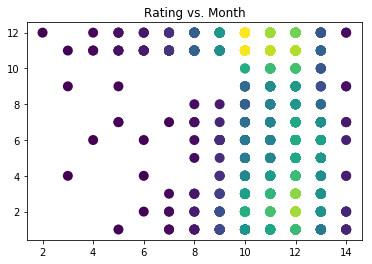

In [84]:
from scipy.stats import gaussian_kde
import numpy as np

x = my_df['rating_numerator']
y = my_df['month']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.title('Rating vs. Month')
plt.show()

A good concentration of ratings between 10 and 12 for the winter, while there is some small indication of higher ratings for summer.

What about the ratings versus retweet and favorite counts?

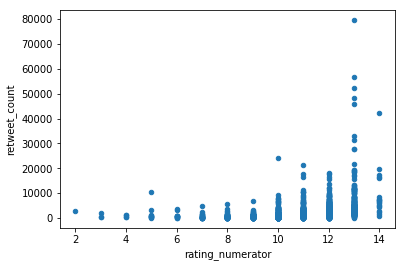

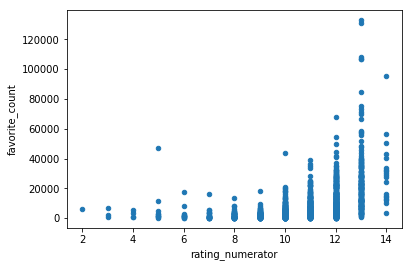

In [85]:
my_df[['rating_numerator','retweet_count']].plot.scatter(x='rating_numerator',y='retweet_count')
my_df[['rating_numerator','favorite_count']].plot.scatter(x='rating_numerator',y='favorite_count')
plt.show()

Not too surprising that the higher rated, more retweeted and favorited. However, the rating 14 doesn't seem to be as popular as 13.

Now let's look at the top 10 tweeted dogs.

In [86]:
top10_dogs = my_df['p1'].value_counts().rename_axis('breed').reset_index(name='counts')
top10_dogs = top10_dogs[:10]
top10_dogs

,breed,counts
0,golden_retriever,134
1,labrador_retriever,91
2,pembroke,88
3,chihuahua,78
4,pug,54
5,chow,41
6,samoyed,40
7,toy_poodle,37
8,pomeranian,37
9,malamute,29


Tying this back to my dataframe to get some more stats.

In [87]:
top10_dogs_df = pd.merge(top10_dogs['breed'].to_frame(), my_df, how='inner', left_on=['breed'], right_on=['p1'], sort=True)
top10_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 6 columns):
breed               629 non-null object
month               629 non-null int64
rating_numerator    629 non-null int64
retweet_count       629 non-null int64
favorite_count      629 non-null int64
p1                  629 non-null object
dtypes: int64(4), object(2)
memory usage: 34.4+ KB


In [88]:
top10_dogs_df.drop(['month','p1'], axis=1, inplace=True)
top10_dogs.reset_index(drop=True, inplace=True)
top10_dogs_df.head()

,breed,rating_numerator,retweet_count,favorite_count
0,chihuahua,9,92,172
1,chihuahua,7,52,131
2,chihuahua,10,134,425
3,chihuahua,7,132,349
4,chihuahua,9,294,565


In [89]:
top10_avg = top10_dogs_df.pivot_table(index='breed',values=['rating_numerator','retweet_count','favorite_count'],aggfunc='mean')
top10_avg

,favorite_count,rating_numerator,retweet_count
breed,,,
chihuahua,8634.948718,10.692308,2815.512821
chow,9859.536585,11.609756,2838.073171
golden_retriever,12416.701493,11.567164,3653.141791
labrador_retriever,12140.879121,11.131868,3951.186813
malamute,8592.379310,10.896552,2545.482759
pembroke,11304.034091,11.443182,3185.988636
pomeranian,7535.621622,11.189189,2687.810811
pug,5930.055556,10.240741,1836.703704
samoyed,13574.775000,11.700000,4623.050000


Very interesting. Let's sort these one at a time.

In [90]:
top10_avg['rating_numerator'].sort_values(ascending=False)

breed
samoyed               11.700000
chow                  11.609756
golden_retriever      11.567164
pembroke              11.443182
pomeranian            11.189189
labrador_retriever    11.131868
toy_poodle            11.054054
malamute              10.896552
chihuahua             10.692308
pug                   10.240741
Name: rating_numerator, dtype: float64

In [91]:
top10_avg['retweet_count'].sort_values(ascending=False)

breed
samoyed               4623.050000
labrador_retriever    3951.186813
golden_retriever      3653.141791
pembroke              3185.988636
chow                  2838.073171
chihuahua             2815.512821
pomeranian            2687.810811
malamute              2545.482759
toy_poodle            2513.783784
pug                   1836.703704
Name: retweet_count, dtype: float64

In [92]:
top10_avg['favorite_count'].sort_values(ascending=False)

breed
samoyed               13574.775000
golden_retriever      12416.701493
labrador_retriever    12140.879121
pembroke              11304.034091
chow                   9859.536585
chihuahua              8634.948718
malamute               8592.379310
pomeranian             7535.621622
toy_poodle             6774.270270
pug                    5930.055556
Name: favorite_count, dtype: float64

Looks like Samoyed is quite the popular dog! Retrievers may be lagging due to being more commonly tweeted. Let's look at a box-and-whisker plot to see how spread out the ratings are.

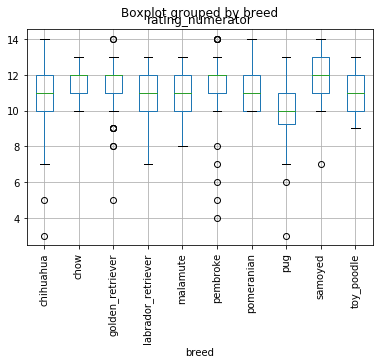

In [93]:
top10_dogs_df.boxplot(by ='breed', column =['rating_numerator'], grid = True)
plt.xticks(rotation=90)
plt.show()

Yep, Samoyed is definitely solid in ratings with a tight spread, while retrievers have longer lower-rated spread. Medians are definitely different as well with Samoyed being 12 and both retrievers being at 11. Clearly, we have a winner!

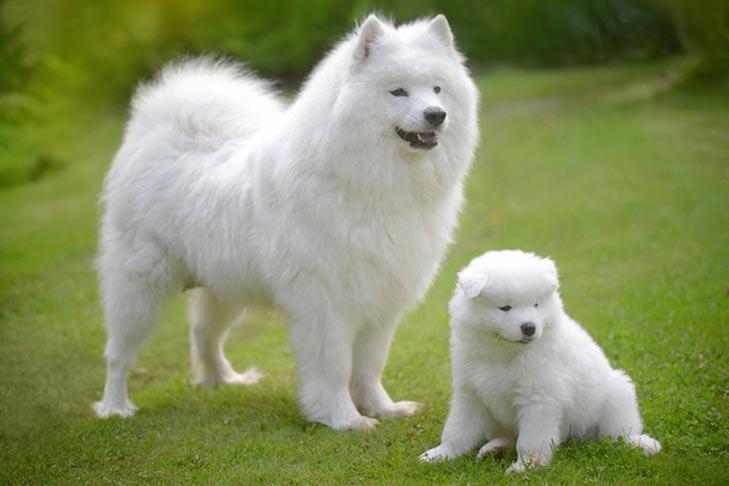